<a href="https://colab.research.google.com/github/yweslakarep123/ant_colony_iris/blob/main/code_ant_colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>STUDI KASUS ANT COLONY OPTIMIZATION PADA DATASET IRIS</h1>

<p>Dataset IRIS merupakan salah satu dataset yang populer dalam perpustakaan sklearn. Banyak algoritma pembelajaran mesin yang memanfaatkannya untuk menyelesaikan berbagai permasalahan klasifikasi. Meskipun awalnya dikenal sebagai dataset klasifikasi, kami tertarik untuk mengeksplorasi kemungkinan clustering pada dataset IRIS.</p>

<p>Untuk melakukan proses clustering, kami tertarik untuk menerapkan algoritma koloni semut (ant colony) dan mengevaluasi hasilnya. Dengan menggunakan pendekatan ini, kami berharap dapat menggali potensi cluster dalam dataset IRIS dan menilai kinerja algoritma clustering yang kami terapkan.</p>

<h1>FULL CODE</h1>

<ipython-input-1-74222cf4e4ae>:32: RuntimeWarning: divide by zero encountered in scalar divide
  pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])


Adjusted Rand Index (ARI): 0.7436826319432358
Silhouette Score: 0.5511573791952857


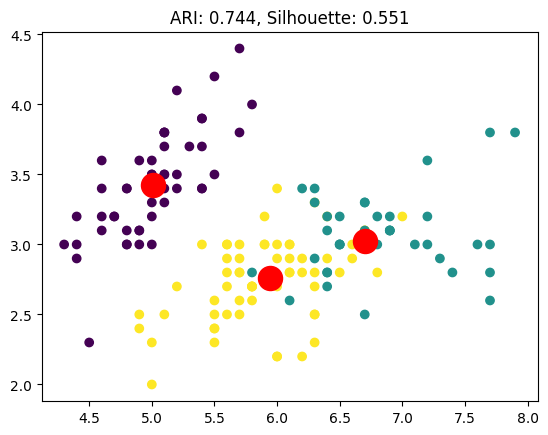

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, silhouette_score

class AntColonyClustering:
    def __init__(self, data, num_clusters, num_ants, num_iterations, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_init=1.0):
        self.data = data
        self.num_clusters = num_clusters
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.pheromone = np.ones((len(data), num_clusters)) * pheromone_init
        self.best_centroids = None

    def initialize_centroids(self):
        indices = np.random.choice(len(self.data), self.num_clusters, replace=False)
        return self.data[indices]

    def assign_clusters(self, centroids):
        distances = cdist(self.data, centroids, metric='euclidean')
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def update_pheromone(self, assignments, centroids):
        pheromone_delta = np.zeros_like(self.pheromone)
        for i in range(len(self.data)):
            pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])
        self.pheromone = (1 - self.evaporation_rate) * self.pheromone + pheromone_delta

    def update_centroids(self, assignments):
        centroids = np.zeros((self.num_clusters, self.data.shape[1]))
        for k in range(self.num_clusters):
            cluster_points = self.data[assignments == k]
            if len(cluster_points) > 0:
                centroids[k] = cluster_points.mean(axis=0)
            else:
                centroids[k] = self.data[np.random.choice(len(self.data))]
        return centroids

    def fit(self):
        best_assignments = None
        best_centroids = None
        best_score = np.inf

        for iteration in range(self.num_iterations):
            centroids = self.initialize_centroids()
            for ant in range(self.num_ants):
                assignments = self.assign_clusters(centroids)
                score = self.calculate_score(assignments, centroids)
                if score < best_score:
                    best_score = score
                    best_assignments = assignments
                    best_centroids = centroids
                self.update_pheromone(assignments, centroids)
                centroids = self.update_centroids(assignments)

        self.best_centroids = best_centroids
        return best_assignments

    def calculate_score(self, assignments, centroids):
        score = 0.0
        for i in range(len(self.data)):
            score += np.linalg.norm(self.data[i] - centroids[assignments[i]])
        return score


    def evaluate_ari(true_labels, predicted_labels):
        ari = adjusted_rand_score(true_labels, predicted_labels)
        return ari


    def evaluate_silhouette(data, predicted_labels):
        silhouette_avg = silhouette_score(data, predicted_labels)
        return silhouette_avg

# Contoh penggunaan
if __name__ == "__main__":
    data = load_iris().data
    true_labels = load_iris().target

    aco_clustering = AntColonyClustering(data, num_clusters=3, num_ants=5, num_iterations=25)
    predicted_labels = aco_clustering.fit()
    centroids = aco_clustering.best_centroids

    # Evaluasi hasil clustering
    ari = AntColonyClustering.evaluate_ari(true_labels, predicted_labels)
    silhouette_avg = AntColonyClustering.evaluate_silhouette(data, predicted_labels)

    print(f"Adjusted Rand Index (ARI): {ari}")
    print(f"Silhouette Score: {silhouette_avg}")

    # Visualisasi hasil clustering
    plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
    plt.title(f'ARI: {ari:.3f}, Silhouette: {silhouette_avg:.3f}')
    plt.show()


<h1>PENJELASAN CODE</h1>

<h2>insialisasi variabel</h2>
<p>sebelum, menajalankan algoritma kita perlu meng inisialisasi variabel</p>


In [2]:
def initialize(data, num_clusters, num_ants, num_iterations, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_init=1.0):
    data = data
    num_clusters = num_clusters
    num_ants = num_ants
    num_iterations = num_iterations
    alpha = alpha
    beta = beta
    evaporation_rate = evaporation_rate
    pheromone_init = pheromone_init
    pheromone = np.ones((len(data), num_clusters)) * pheromone_init
    best_centroids = None
    return data, num_clusters, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_init

data = load_iris().data
print(initialize(data, 3, 10, 50))

(array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 

<h2>inisialisasi centroid</h2>
<p>Centroid adalah titik pusat atau representatif dari suatu kelompok atau cluster dalam ruang data. Dalam konteks clustering, centroid sering kali merupakan titik rata-rata dari semua titik data dalam sebuah cluster.</p>

<p>Misalnya, jika kita memiliki sebuah dataset dengan dua fitur (misalnya, panjang dan lebar sepal dari bunga iris), kita bisa melakukan clustering untuk mengelompokkan data menjadi beberapa kelompok berdasarkan kedekatan titik-titik data. Setiap kelompok akan memiliki centroid, yang merupakan titik pusat dari kelompok tersebut.</p>

In [3]:
def initialize_centroids(data, num_clusters):
  indices = np.random.choice(len(data), num_clusters, replace=False)
  return data[indices]
# Muat dataset iris
data = load_iris().data

# Inisialisasi centroids
centroids = initialize_centroids(data, 3)

print(centroids)


[[5.2 4.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [5.8 2.7 4.1 1. ]]


<h2>Menyiapkan Cluster</h2>
<p>Langkah ini adalah langkah utama dalam proses clustering. Langkah ini digunakan untuk menetapkan titik data ke cluster tertentu berdasarkan kedekatan jaraknya dengan centroid.</p>

In [4]:
import numpy as np
from scipy.spatial.distance import cdist

def assign_clusters(data, centroids):
    distances = cdist(data, centroids, metric='euclidean')
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])
data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

print(assign_clusters(data, centroids))


[2 0 0]


<p>bisa dilihat dalam code ini, dalam pendeklerasian cluster terlihat bahwa ant colony akan mengalami masalah dalam membedakan bunga IRIS. Hal ini dapat di analisa pada hasil output array yang menunjukkan nilai [2 0 0].</p>


<h2>Kalkulasi score</h2>
<p>langkah ini digunakan  menghitung skor total dari suatu penugasan cluster terhadap centroid tertentu, yang dapat digunakan untuk mengevaluasi kualitas dari clustering yang dihasilkan. Semakin kecil nilai skor, semakin baik penugasan clusternya, karena itu menunjukkan bahwa titik-titik data dalam cluster cenderung berada dekat dengan centroidnya.</p>


In [5]:
def calculate_score(data, assignments, centroids):
  score = 0.0
  for i in range(len(data)):
      score += np.linalg.norm(data[i] - centroids[assignments[i]])
  return score

data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])

print(calculate_score(data, [2,0,0], centroids))

12.738817110057054


<p>nilai output calculate_score  menunjukkan total jarak antara setiap titik data dalam dataset dengan centroid cluster yang ditugaskan kepadanya. Semakin kecil nilai skor, semakin baik kualitas clusteringnya, karena menunjukkan bahwa titik-titik data cenderung berada dekat dengan centroidnya.</p>

<h2>Feromon dan Update feromon</h2>
<p>Dalam konteks algoritma koloni semut (ant colony optimization), feromon merupakan konsep yang diadopsi dari perilaku semut yang sebenarnya. Ketika semut menemukan jalur menuju sumber makanan, mereka meninggalkan jejak feromon yang berfungsi sebagai petunjuk bagi semut lain untuk mengikuti jalur yang sama. Seiring waktu, semut yang mengikuti jalur tersebut akan meninggalkan jejak feromon tambahan, yang membuat jalur tersebut semakin menonjol.</p>



In [6]:
def update_pheromone(data, assignments, centroids, pheromone, evaporation_rate):
  pheromone_delta = np.zeros_like(pheromone)
  for i in range(len(data)):
    pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(data[i] - centroids[assignments[i]])
    pheromone = (1 - evaporation_rate) * pheromone + pheromone_delta
  return pheromone

data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])
pheromone = np.ones((len(data), 3)) * 1

print(update_pheromone(data,[2,0,0], centroids, pheromone, 0.5))

[[0.125      0.125      0.445629  ]
 [0.5162304  0.125      0.125     ]
 [0.41512943 0.125      0.125     ]]


<p>output diatas adalah jalur yang lebih optimal dalam ruang pencarian. Semut-senut "meletakkan" feromon di jalur-jalur yang mereka eksplorasi, dan intensitas feromon di suatu jalur dipengaruhi oleh kualitas solusi yang ditemukan. Dengan demikian, semakin baik kualitas solusi, semakin tinggi intensitas feromonnya.</p>

<h2>update centroid</h2>
<p>fungsi ini digunkaan untuk mengupdate centroid agar algoritma bisa mengcluster data lebih optimal</p>

In [7]:
def update_centroids(data, assignments, num_clusters):
  centroids = np.zeros((num_clusters, data.shape[1]))
  for k in range(num_clusters):
    cluster_points = data[assignments == k]
    if len(cluster_points) > 0:
      centroids[k] = cluster_points.mean(axis=0)
    else:
      centroids[k] = data[np.random.choice(len(data))]
  return centroids

data = np.array([[2.1, 2.6, 3.3, 4.6],
                 [3.2, 1.8, 4.3, 2.1],
                 [3.7, 3.5, 4.5, 2.7]])

centroids = np.array([[6.8, 2.8, 4.8, 1.4],
                      [7.1, 3.0, 5.9, 2.1],
                      [4.8, 3.1, 1.6, 0.2]])


print(update_centroids(data, [2,0,0], 3))

[[2.1 2.6 3.3 4.6]
 [3.2 1.8 4.3 2.1]
 [3.7 3.5 4.5 2.7]]


<p>output diatas adalah centroid yang baru yang akan digunakan di algoritma</p>

<h2>EVALUASI</h2>
saat di evaluasi, ARI memberi nilai 0.729 dan silhouette memberi nilai 0.29. ARi dan silhouette adalah metrics yang sering digunakan dalam clusterin untuk membandingkan data. Dalam case kita, nilai tersebur termasuk nilai yang baik meskipun belum mencapi nilai maksimal.</p>


In [8]:
def evaluate_ari(true_labels, predicted_labels):
  ari = adjusted_rand_score(true_labels, predicted_labels)
  return ari


def evaluate_silhouette(data, predicted_labels):
  silhouette_avg = silhouette_score(data, predicted_labels)
  return silhouette_avg

data = load_iris().data
true_labels = load_iris().target
predicted_labels = aco_clustering.fit()

print(evaluate_ari(true_labels, predicted_labels))
print(evaluate_silhouette(data, predicted_labels))

<ipython-input-1-74222cf4e4ae>:32: RuntimeWarning: divide by zero encountered in scalar divide
  pheromone_delta[i, assignments[i]] += 1.0 / np.linalg.norm(self.data[i] - centroids[assignments[i]])


0.7302382722834697
0.5528190123564095


<h2>VISUALISASI</h2>
<p>Didalam plot tersebut bisa dilihat bahwa terdapat dua data yang digunakan untuk training ada yang memiliki kemiripan yang sama sehingga algoritma ant colony sulit untuk membedakan</p>

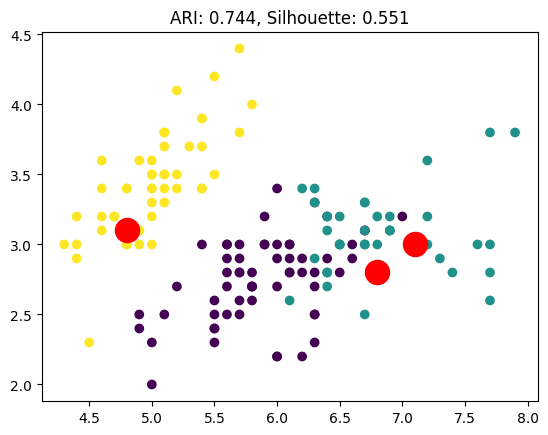

In [9]:
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.title(f'ARI: {ari:.3f}, Silhouette: {silhouette_avg:.3f}')
plt.show()

<h1>KESIMPULAN</h1>
<p>Ant colony adalah algoritma optimasi yang memiliki kemampuan untuk melakukan clustering. Dalam studi kasus pengelompokan dataset IRIS, terlihat bahwa performa algoritma ant colony cenderung kurang optimal. Hal ini disebabkan oleh karakteristik dataset IRIS yang memiliki nilai-nilai input yang relatif serupa satu sama lain. Meskipun demikian, algoritma ini tetap mampu menyelesaikan permasalahan clustering, namun terdapat tantangan dalam menghasilkan pengelompokan yang sangat baik.</p>